In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()        

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
#setting path to directory
csv_directory = "C:/Users/annar/OneDrive/Desktop/Visual Studio/GitHub/Projects2/Insighter/Zomato_food_reviews/Data"
os.chdir(csv_directory)

In [4]:
data = pd.read_csv("./csv_files/100N.csv")
data.head()

,Reviews
0,good food
1,Tasty and fresh! Very good portion size! Enjoy...
2,omlette and sauteed veggies were good. bread w...
3,Very nicely done..loved the custard fruit bowl...
4,"Requested not to add onions, however it was no..."


In [5]:
data['polarity']=[analyzer.polarity_scores(text)['compound'] for text in data.Reviews]
data.head()

,Reviews,polarity
0,good food,0.4404
1,Tasty and fresh! Very good portion size! Enjoy...,0.9557
2,omlette and sauteed veggies were good. bread w...,0.1759
3,Very nicely done..loved the custard fruit bowl...,0.4927
4,"Requested not to add onions, however it was no...",0.0000


In [6]:
def get_sentiment(polarity):
    if polarity <= 0.0:
        return 'Negative'
    elif polarity > 0.2:
        return 'Positive'
    else:
        return 'Neutral'

In [7]:
data['sentiment']=data.polarity.apply(get_sentiment)
data.head()

,Reviews,polarity,sentiment
0,good food,0.4404,Positive
1,Tasty and fresh! Very good portion size! Enjoy...,0.9557,Positive
2,omlette and sauteed veggies were good. bread w...,0.1759,Neutral
3,Very nicely done..loved the custard fruit bowl...,0.4927,Positive
4,"Requested not to add onions, however it was no...",0.0000,Negative


<AxesSubplot: >

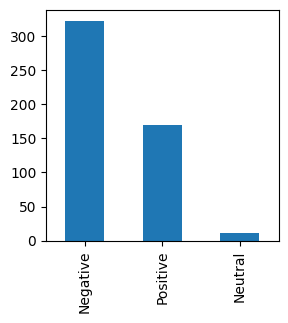

In [9]:
plt.figure(figsize=(3,3))
data.sentiment.value_counts().plot.bar()